In [164]:
import os
import SimpleITK as sitk
import numpy as np
import radiomics
import matplotlib.pyplot as plt
from skimage import io as skio
from skimage.color import rgb2gray
import cv2

In [165]:
from radiomics import featureextractor, getFeatureClasses
from radiomics import glcm

In [166]:
cwd = os.getcwd()

In [167]:
im= skio.imread('textured-triangle.png')
im = rgb2gray(im)
im.shape

(300, 400)

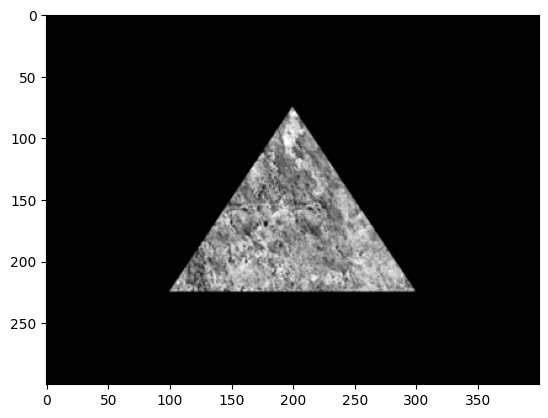

In [168]:
plt.imshow(im, cmap="gray")

In [169]:
#croping image:
n, p = im.shape

# Si la hauteur est plus grande que la largeur, recadrez en carré
if n > p:
    diff = (n - p) // 2
    im = im[diff:diff + p, :]
# Si la largeur est plus grande que la hauteur, recadrez en carré
elif p > n:
    diff = (p - n) // 2
    im = im[:, diff:diff + n]

# Maintenant, im est une image carrée
n, p = im.shape
n,  p

(300, 300)

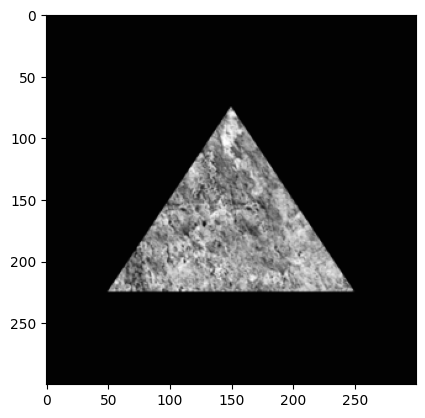

In [170]:
plt.imshow(im, cmap='gray')

In [171]:
#creation du mask

def mask(h, l, side_length):
    image = np.zeros((h, l), dtype=np.uint8)
    half_side = side_length / 2
    x1 = int((l - side_length) / 2)
    x2 = int((l + side_length) / 2)
    y1 = int((h + (side_length * np.sqrt(3) / 2)) / 2)
    y2 = int((h + (side_length * np.sqrt(3) / 2)) / 2 - side_length * np.sqrt(3) / 2)

    pts = np.array([[x1, y1], [x2, y1], [l // 2, y2]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image, [pts], 1)

    return image

Text(0.5, 1.0, 'mask')

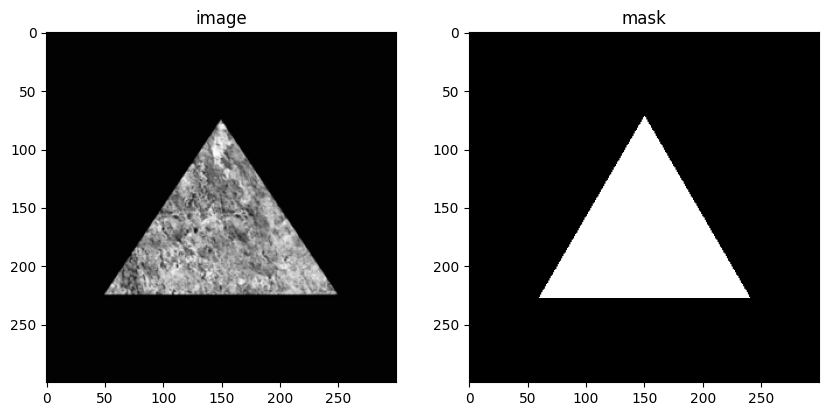

In [172]:
plt.figure(figsize=(10,10))
# First image
plt.subplot(2,2,1)
plt.imshow(im, cmap = 'gray')
plt.title("image")
plt.subplot(2,2,2)
plt.imshow(mask(300, 300, 180), cmap = 'gray')
plt.title("mask")

In [173]:
# Transform image and mask to format
im_ITK, mask_ITK  = sitk.GetImageFromArray(im), sitk.GetImageFromArray(mask(300, 300, 180))

In [179]:
extractor=featureextractor.RadiomicsFeatureExtractor()
extractor.enableFeaturesByName()

In [188]:
featuresVector = extractor.execute(im_ITK, mask_ITK)
numeric_features = {}

# Liste des noms de caractéristiques (clefs du dictionnaire) à partir de l'indice 24
feature_names = list(featuresVector.keys())[24:]

# Itérez à travers la liste des noms de caractéristiques
for feature_name in feature_names:
    feature_value = featuresVector[feature_name]
    numeric_features[feature_name] = feature_value


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [189]:
#compute only GLCM features
# la matrice de co-occurrence des niveaux de gris (GLCM)
glcmFeatures = glcm.RadiomicsGLCM(im_ITK, mask_ITK)
glcmFeatures.enableAllFeatures()
result = glcmFeatures.execute()

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [190]:
features = np.array(list(numeric_features.values()))
args = list(numeric_features.keys())

In [191]:
import pandas as pd

df=pd.DataFrame({"feature":args, "value": features})

In [193]:
df

,feature,value
0,original_firstorder_Energy,3.448947e+03
1,original_firstorder_Entropy,-3.203427e-16
2,original_firstorder_InterquartileRange,1.369186e-01
3,original_firstorder_Kurtosis,4.393198e+00
4,original_firstorder_Maximum,7.512306e-01
...,...,...
86,original_ngtdm_Busyness,0.000000e+00
87,original_ngtdm_Coarseness,1.000000e+06
88,original_ngtdm_Complexity,0.000000e+00
89,original_ngtdm_Contrast,0.000000e+00
